#### Read in relative spectral response functions

We have downloaded the relative spectral response functions of some commonly used satellites from their official website and stored them in text file for a cross platform usages. Here we demonstrate how to load in the file in python environment.

In [15]:
ls head landsat4_mss_RSR.txt

ls: cannot access head: No such file or directory
landsat4_mss_RSR.txt


In [49]:
!head -18 landsat4_mss_RSR.txt 

These are relative spectral response functions of landsat4_mss, and data are taken from official websites. 
Band name may be different from what you can see on those websites, but the right band numbers are kept. 
c1 is generally what you want to use, but others are also included when they are available. 
Works from Professor Philip Lewis and Jose Gómez-Dans are included.

Feng Yin

Dept. Geography, University College London
Gower St.
London WC1E 6BT, UK
marcyinfeng@gmail.com

c1
band1
550.0
462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0,

From above we can see that there are some discriptions about the data sources, so we want to skip those lines to get the real data. And the data are stored in a cycle, with collections number, band number, center wavelength, and relative spectral reponse with wavelength. So we can create a multi-level dictionary to store the data for later usage.

In [204]:
import numpy as np
import pylab as plt
%matplotlib inline
import glob

In [87]:
data = []
with open('aqua_RSR.txt', 'rb') as f:
    for _ in xrange(12): # skip header
        next(f)
    for i in f:
        data.append(i.strip())#get rid of '\n'
cs = []
for k,i in enumerate(data):
    if 'c' in i :
        cs.append([k,i])
        print k,i

0 c1
29 c10
58 c2
87 c3
116 c4
145 c5
174 c6
203 c7
232 c8
261 c9


Here we can see the number of collections, which can be used as the first level keys, with its indexs. And with 29 as interval, which actually is $4 \times Bands+1$. Now, we can build the dictionary with this rule.

In [106]:
for i in xrange(len(cs)):
    sub = data[29*i:29*(i+1)] #29 = cs[1][0] - cs[0][0]
    key1, bands, cwl, wavelength, rsr = sub[0], sub[1::4], sub[2::4], sub[3::4], sub[4::4]# get the bands...
    break

In [155]:
sub[3::4]

['613.3005, 614.9855, 617.9669, 619.9886, 622.9658, 624.9765, 627.9829, 629.9695, 632.9832, 634.9731, 637.9685, 639.969, 642.9802, 644.9682, 647.9722, 649.9854, 652.9899, 654.967, 657.976, 659.9895, 662.9664, 664.9664, 667.974, 669.9767, 672.9728, 674.9848, 677.9862, 679.9808, 681.4409',
 '820.0762, 822.912, 824.9106, 827.9032, 829.9005, 832.8964, 834.892, 837.8965, 839.9017, 842.9066, 844.9094, 847.9034, 849.8982, 852.8936, 854.9093, 857.893, 859.8955, 862.9063, 864.9007, 867.9084, 869.8902, 872.8912, 874.9006, 877.9136, 879.8975, 882.8942, 884.9071, 887.9057, 889.891, 892.8993, 894.9048, 897.9017, 899.1455',
 '451.4698, 452.2105, 453.1903, 454.2011, 455.2137, 456.1984, 457.21, 458.191, 459.1962, 460.1963, 461.1905, 462.2056, 463.2134, 464.2142, 465.2083, 466.1966, 467.2067, 468.2134, 469.1917, 470.1964, 471.2026, 472.2121, 473.1995, 474.1924, 475.1915, 476.1974, 477.21, 478.2014, 479.1983, 480.1997, 481.2045, 481.226',
 '538.6493, 539.1432, 540.1324, 541.1168, 542.1226, 543.1217, 544

In [109]:
key1, bands, cwl

('c1',
 ['band1', 'band2', 'band3', 'band4', 'band5', 'band6', 'band7'],
 ['645.8403499',
  '856.877853417',
  '466.07150204',
  '553.917076647',
  '1241.49758039',
  '1628.08776832',
  '2113.99922695'])

In [182]:
D = {}
for i in xrange(len(cs)):
    sub = data[29*i:29*(i+1)]
    k, bands, cwl, wavelength, rsr = sub[0], sub[1::4], sub[2::4], sub[3::4], sub[4::4]
    d = {}
    for i, j in enumerate(bands):
        d.update({j:{'cwl':float(cwl[i]), 'wavelength':np.array(wavelength[i].split(',')).astype(float), 'rsr':np.array(rsr[i].split(',')).astype(float)}})
    D.update({k:d})

Here we can see the number of collections, which can be used as the first level keys, with its indexs.

(0, 1)

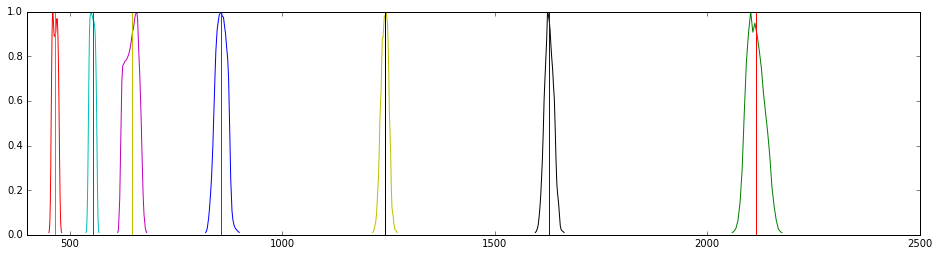

In [183]:
plt.figure(figsize=(16,4))
for i in D['c2'].keys():
    plt.plot(D['c2'][i]['wavelength'], D['c2'][i]['rsr'])
    plt.plot([D['c2'][i]['cwl'],D['c2'][i]['cwl']],[0,1])
plt.xlim(400, 2500)
plt.ylim(0,1)

array('820.0322, 822.0051, 824.0037, 826.9963, 828.9936, 831.9895, 833.9851, 836.9896, 838.9948, 841.9997, 844.0025, 846.9965, 848.9913, 851.9867, 854.0024, 856.9861, 858.9886, 861.9994, 863.9938, 867.0015, 868.9833, 871.9843, 873.9937, 877.0067, 878.9906, 881.9873, 884.0002, 886.9988, 888.9841, 891.9924, 893.9979, 896.9948, 898.9871', 
      dtype='|S328')

So let's wrap it up:

In [9]:
def read_rsr(fname):
    '''
    A python function for the reading of RSR functions from text files in https://github.com/MarcYin/RSR
    --------------------------------------------------------------------------------------------------------------------
    variables
    fname: Filename of text file contain the RSRs.
    
    return
    D: A dictionary of different colletions and bands RSRs, corresponding wavelength and center wavelength of each band.
    
    --------------------------------------------------------------------------------------------------------------------
    '''
    data = []
    with open(fname, 'rb') as f:
        for _ in xrange(12): # skip header
            next(f)
        for i in f:
            data.append(i.strip())#get rid of '\n'
    cs = []
    for k,i in enumerate(data):
        if 'c' in i :
            cs.append([k,i])
    D = {}
    for _,c in enumerate(cs):
        if len(cs)>1:
            gp = cs[1][0] - cs[0][0]
            sub = data[gp*_:gp*(_+1)]
        else:
            sub = data
        k, bands, cwl, wavelength, rsr = sub[0], sub[1::4], sub[2::4], sub[3::4], sub[4::4]

        d = {}
        for i, j in enumerate(bands):
            d.update({j:{'cwl':float(cwl[i]), 'wavelength':np.array(wavelength[i].split(',')).astype(float), 'rsr':np.array(rsr[i].split(',')).astype(float)}})
        D.update({k:d})
    
    return D

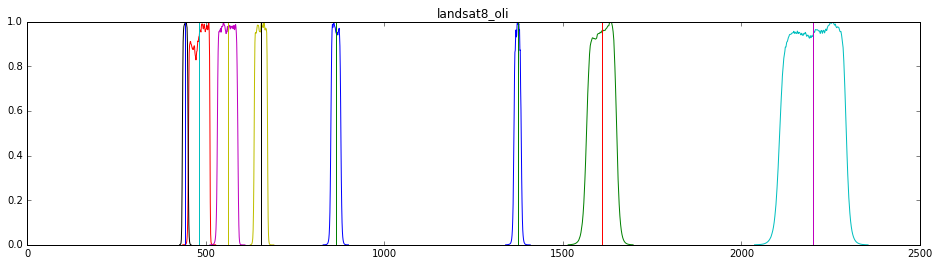

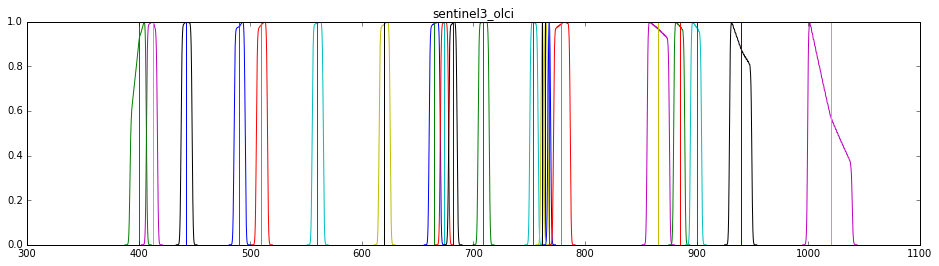

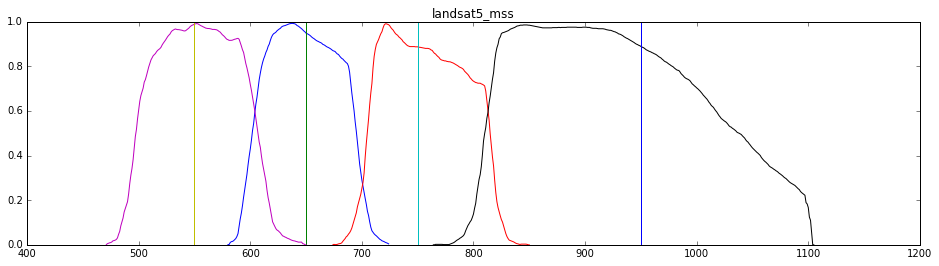

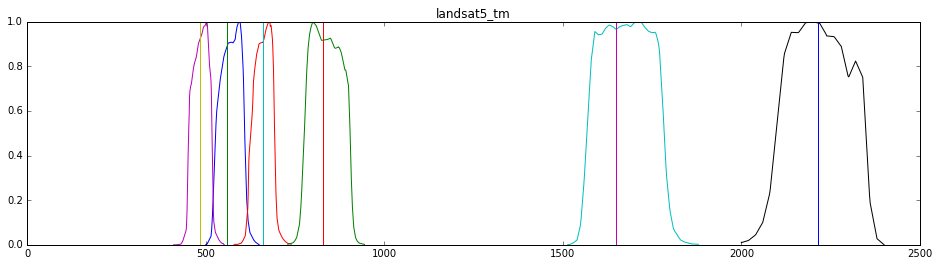

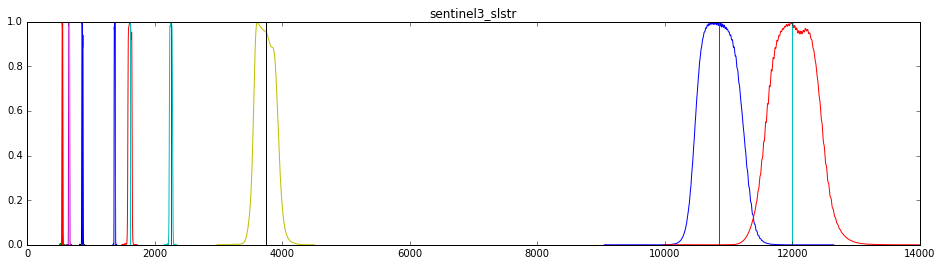

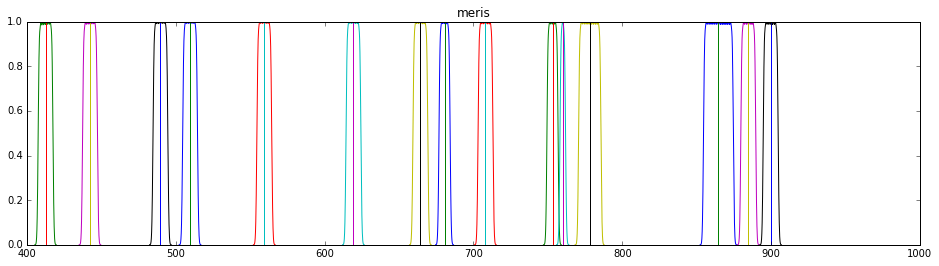

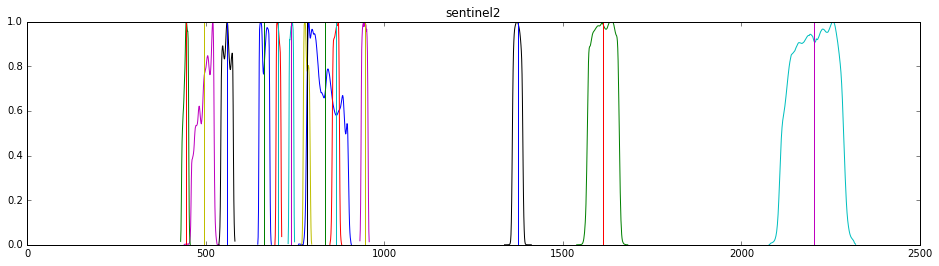

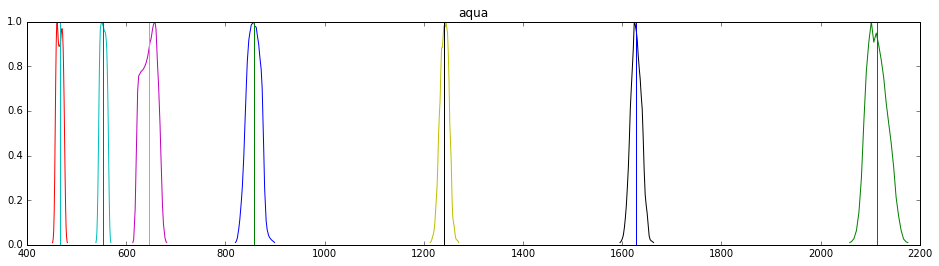

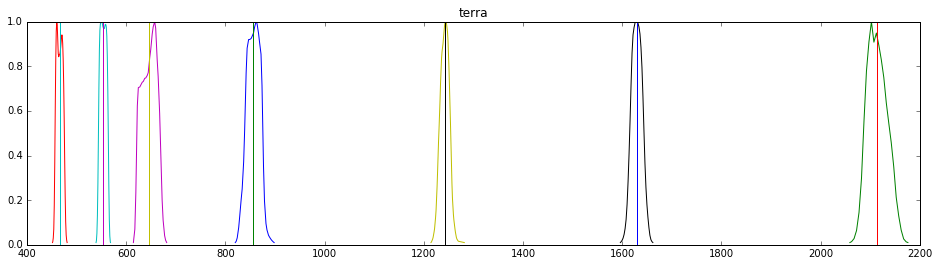

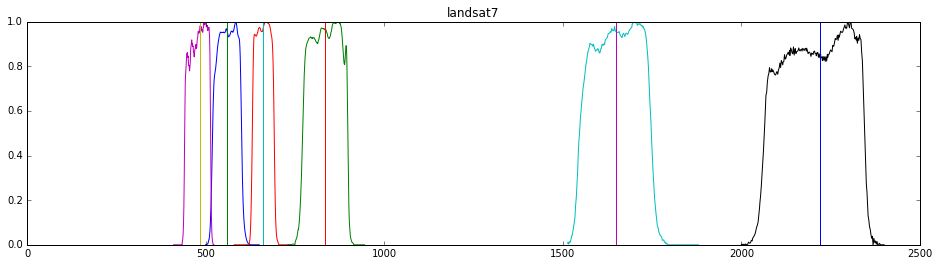

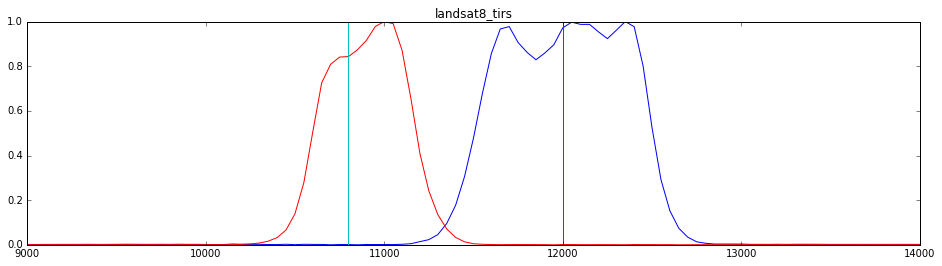

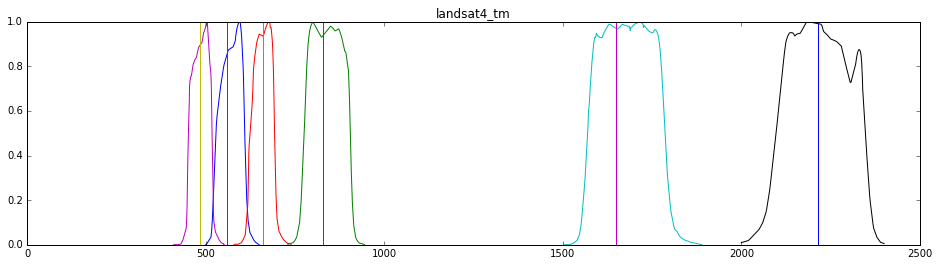

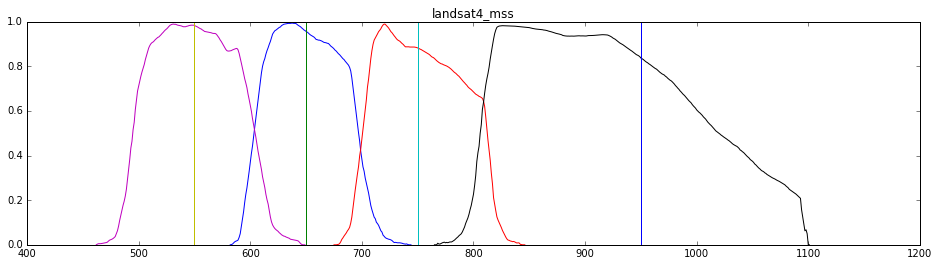

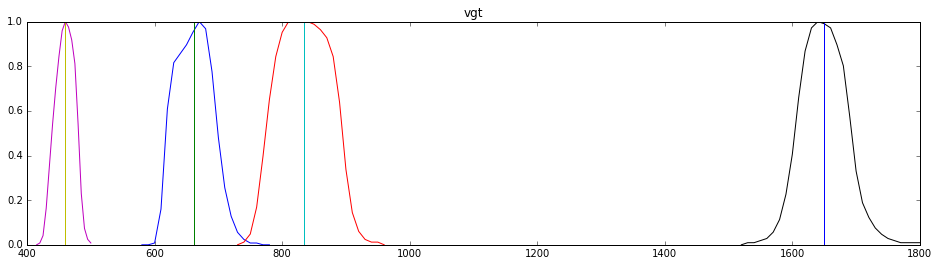

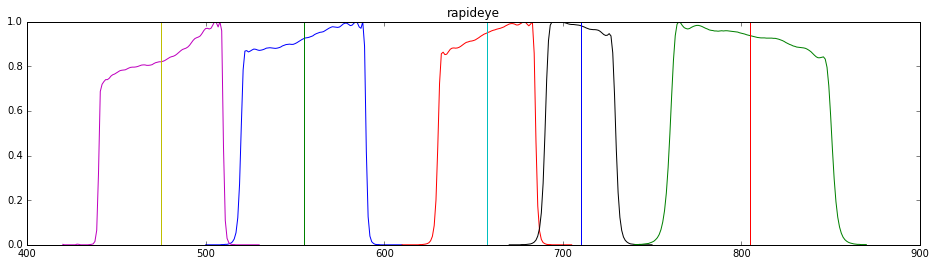

In [207]:
#READ ALL OF THE RSR FILES AND PLOT IT!...
for fn in glob.glob('*RSR.txt'):
    dat = read_rsr(fn)
    plt.figure(figsize=(16,4))
    for i in dat['c1'].keys():
        plt.plot(dat['c1'][i]['wavelength'], dat['c1'][i]['rsr'])
        plt.plot([dat['c1'][i]['cwl'],dat['c1'][i]['cwl']],[0,1])
    #plt.xlim(400, 2500)
    plt.title(fn.split('_RSR')[0])
    plt.ylim(0,1)

In [8]:
read_rsr?